## DATA VISUALIZATION
### Matplotlib, Seaborn, Altair and Bokeh

Using the same Iris dataset structure, here is a comparison of how you would create a scatter plot using Matplotlib, Seaborn, Altair, and Bokeh, highlighting their different syntax.

In [4]:
# data imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

In [5]:
# Read your data
file_name = pd.read_csv('IRIS.csv')

In [13]:
#### Matplotlib is an original Python plotting library. 

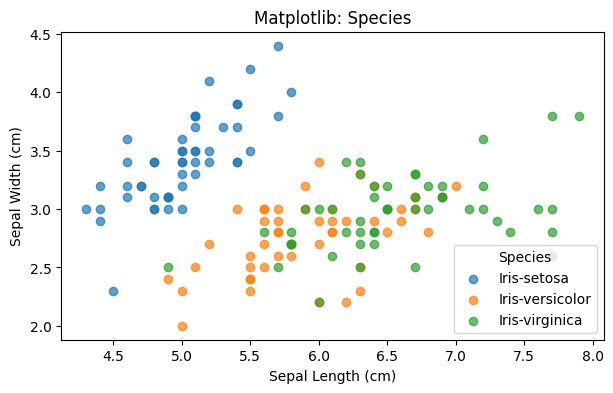

In [23]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(7, 4))

# Plot data by looping through each species
for name, group in file_name.groupby('species'):
    ax.scatter(
        group['sepal_length'], 
        group['sepal_width'], 
        label=name, 
        alpha=0.7 
    )

# Add titles and legend manually
ax.set_title('Matplotlib: Species')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.legend(title='Species')
plt.show()

#### Seaborn is built on top of Matplotlib.

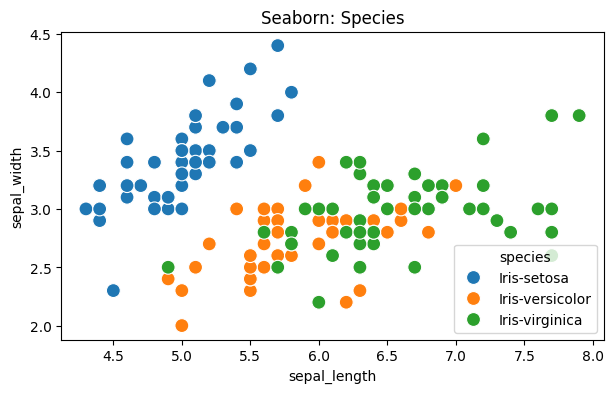

In [ ]:

plt.figure(figsize=(7, 4))

# One line to map the variables and plot
sns.scatterplot(
    data=file_name, 
    x='sepal_length', 
    y='sepal_width', 
    hue='species', # Automatically handles coloring and legend
    s=100 # Adjust point size
)

plt.title('Seaborn: Species')
plt.show()

#### Altair implements a declarative grammar (Vega-Lite), meaning you tell it what to plot by mapping data columns to visual encodings (x, y, color). It creates interactive plots

In [ ]:

chart = alt.Chart(file_name).mark_circle().encode(
    # Map column names to the X and Y axes
    x=alt.X('sepal_length', title='Sepal Length (cm)'),
    y=alt.Y('sepal_width', title='Sepal Width (cm)'),
    
    # Map the species column to the color encoding
    color='species',
    
    # Add tooltips for immediate feedback
    tooltip=['sepal_length', 'sepal_width', 'species'] 
).properties(
    title='Altair: Species'
).interactive() # Allows zooming and panning

chart.display()

alt.Chart(...)

#### Bokeh is designed for creating complex, dynamic, web-based visualizations.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10 # Import a color palette
from bokeh.transform import factor_cmap # Key function for categorical coloring

# 1. Prepare Data Source
# (Assume file_name is the Pandas DataFrame loaded with the Iris data)
source = ColumnDataSource(file_name) 

# Get the unique species names to define the color factors
species_list = file_name['species'].unique().tolist() 

# 2. Set up the figure object
p = figure(
    title='Bokeh: Species',
    x_axis_label='Sepal Length (cm)', 
    y_axis_label='Sepal Width (cm)',
    height=400, 
    width=600,
    tools="pan,wheel_zoom,box_zoom,reset,hover" 
)

# 3. Plot the scatter points using the factor_cmap
p.scatter(
    x='sepal_length', 
    y='sepal_width', 
    source=source, 
    
    # --- The CRITICAL CORRECTION: Use factor_cmap ---
    # 1. field_name: The column to map colors from ('species')
    # 2. palette: The list of colors to use (Category10[3] gives 3 distinct colors)
    # 3. factors: The list of unique values in the column (species_list)
    color=factor_cmap('species', palette=Category10[3], factors=species_list),
    
    legend_field='species', # Still needed to correctly label the legend items
    size=8, 
    alpha=0.6,
    line_color='white'
)

p.legend.location = "top_left"
show(p)

## Other plots:

### Relationships by specie

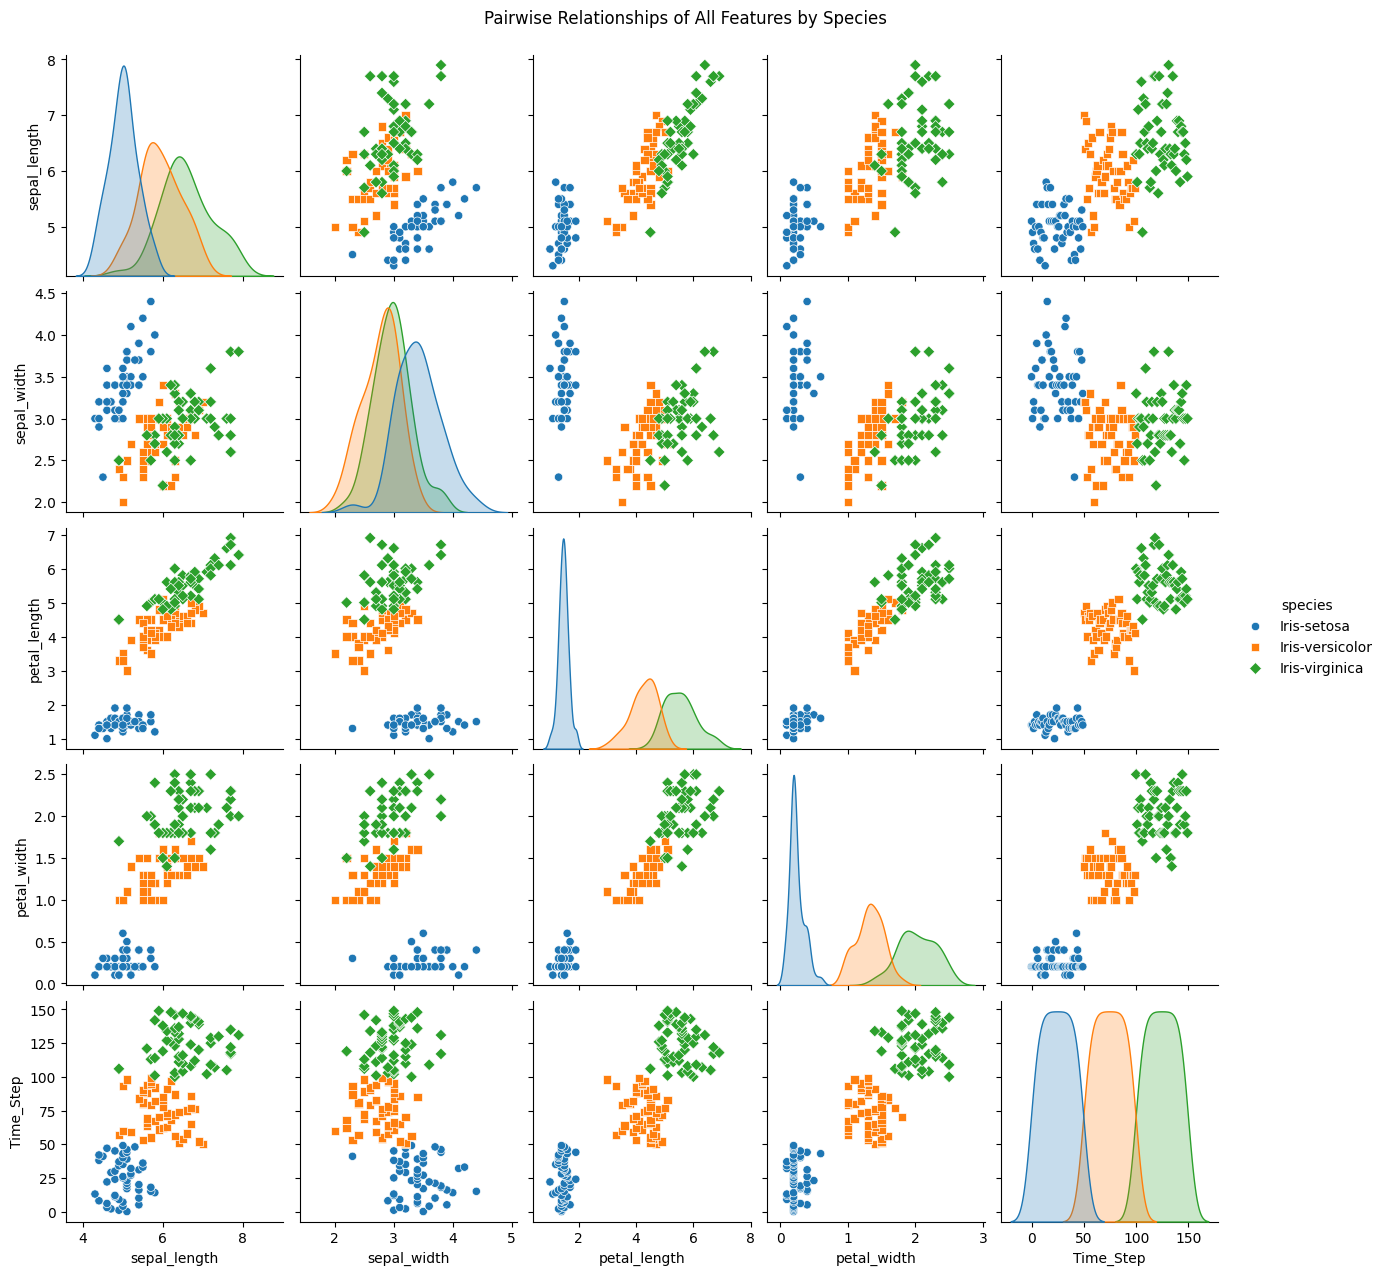

In [32]:

# Create the pair plot, coloring all points by the 'species'
sns.pairplot(
    file_name, 
    hue='species', 
    diag_kind='kde', # Show density plot on the diagonal
    markers=["o", "s", "D"] # Use different markers for clarity
)
plt.suptitle('Pairwise Relationships of All Features by Species', y=1.02)
plt.show()

## Simulated Time series

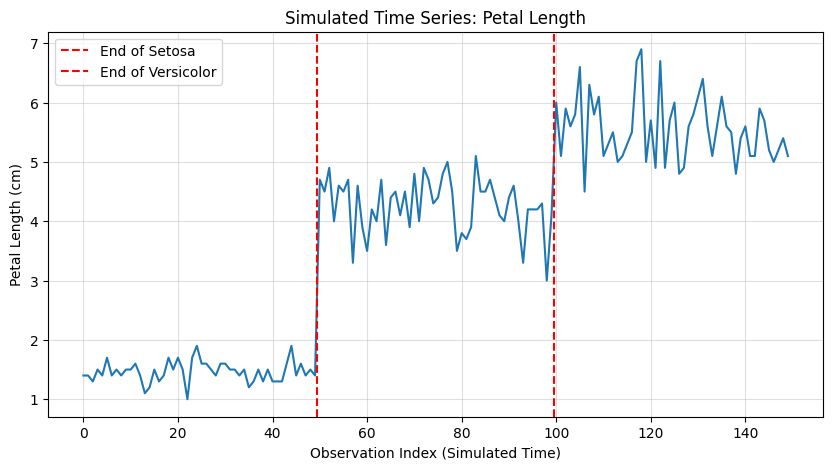

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
file_name['Time_Step'] = file_name.index
# Plot the petal length over the synthetic time index
plt.plot(file_name['Time_Step'], file_name['petal_length'])

# Add markers to show where the species change
# (Knowing that species boundaries are usually around index 49 and 99)
plt.axvline(x=49.5, color='r', linestyle='--', label='End of Setosa')
plt.axvline(x=99.5, color='r', linestyle='--', label='End of Versicolor')

plt.title('Simulated Time Series: Petal Length')
plt.xlabel('Observation Index (Simulated Time)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()